In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

## Registered Users table

In [2]:
users = pd.read_excel('user_purchase_data.xlsx', sheet_name='user_registration')
users.sample(10)

,userID,is_subscriber
54848,54849,No
32300,32301,No
79967,79968,No
171995,171996,No
96550,96551,No
11700,11701,No
127249,127250,No
62904,62905,No
192114,192115,No
4908,4909,No


In [4]:
users.shape

(201217, 2)

In [5]:
users.isna().sum()

userID           0
is_subscriber    0
dtype: int64

In [7]:
users['userID'].nunique() == users.shape[0]

True

In [50]:
users['is_subscriber'].value_counts(dropna=False)

No     199633
Yes      1584
Name: is_subscriber, dtype: int64

In [49]:
round(100*users['is_subscriber'].value_counts(dropna=False, normalize = True), 2)

No     99.21
Yes     0.79
Name: is_subscriber, dtype: float64

In [47]:
users.dtypes

userID            int64
is_subscriber    object
dtype: object

## Mobile Orders table

In [12]:
mobile = pd.read_excel('user_purchase_data.xlsx', sheet_name='mobile_orders')
mobile.sample(10)

,user_id,mobile_orders
24982,35550,5
64977,202035,2
86876,123522,26
126657,179944,7
51424,73346,6
115510,164224,4
90607,128848,6
132246,187837,5
110327,156896,13
89291,126990,4


In [13]:
mobile.shape

(141690, 2)

In [14]:
mobile.isna().sum()

user_id          0
mobile_orders    0
dtype: int64

In [15]:
mobile['user_id'].nunique() == mobile.shape[0]

True

In [18]:
mobile.dtypes

user_id          int64
mobile_orders    int64
dtype: object

In [16]:
mobile['mobile_orders'].describe()

count    141690.000000
mean          9.565947
std          24.138480
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max        1174.000000
Name: mobile_orders, dtype: float64

<AxesSubplot: ylabel='Frequency'>

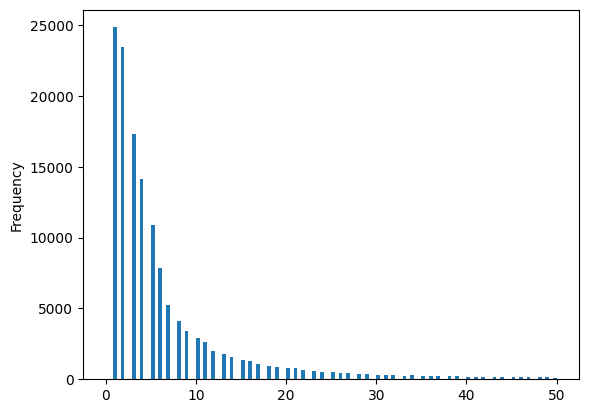

In [21]:
mobile['mobile_orders'].plot(kind='hist', bins=120, range=[0,50])

In [31]:
mobile[~mobile['user_id'].isin(users['userID'])].shape[0]

1827

## In-Store Orders table

In [32]:
in_store = pd.read_excel('user_purchase_data.xlsx', sheet_name='in_store_orders')
in_store.sample(10)

,user_id,in_store_orders
12490,47114,15
50553,191098,2
20848,78428,22
48265,182476,6
19467,73171,2
20077,75449,51
32424,122278,6
30740,115931,15
5507,20633,19
19385,72869,1


In [33]:
in_store.shape

(53287, 2)

In [34]:
in_store.isna().sum()

user_id            0
in_store_orders    0
dtype: int64

In [36]:
in_store['user_id'].nunique() == in_store.shape[0]

True

In [38]:
in_store.dtypes

user_id            int64
in_store_orders    int64
dtype: object

In [37]:
in_store['in_store_orders'].describe()

count    53287.000000
mean        23.849701
std         55.010021
min          1.000000
25%          3.000000
50%          9.000000
75%         24.000000
max       1419.000000
Name: in_store_orders, dtype: float64

<AxesSubplot: ylabel='Frequency'>

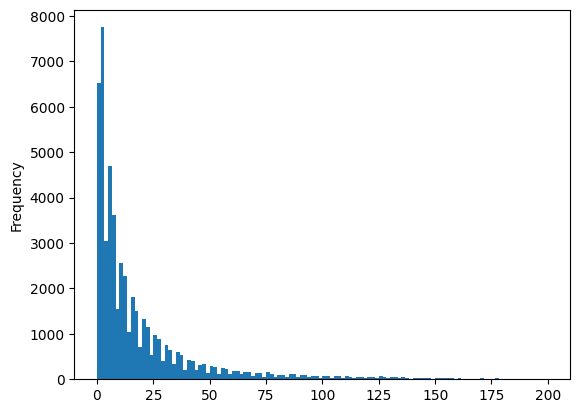

In [44]:
in_store['in_store_orders'].plot(kind='hist', bins=120, range=[0,200])

In [56]:
in_store[~in_store['user_id'].isin(users['userID'])].shape[0]

1554

## Dataframe Manipulation

In [58]:
users.rename(columns={'userID':'user_id'}, inplace = True)

In [62]:
users['user_category'] = ['Premium' if i=='Yes' else 'Free' for i in users['is_subscriber'].values]
users.drop(columns='is_subscriber', inplace = True)
users

In [64]:
users['user_category'].value_counts()

Free       199633
Premium      1584
Name: user_category, dtype: int64

In [67]:
orders = pd.merge(users, mobile, how = 'left', on = 'user_id').merge(in_store, how = 'left', on = 'user_id')

In [68]:
orders.isna().sum()

user_id                 0
user_category           0
mobile_orders       61354
in_store_orders    149484
dtype: int64

In [69]:
for col in orders.columns[2:]:
    orders[col] = orders[col].fillna(0)
orders.head()

,user_id,user_category,mobile_orders,in_store_orders
0,1,Free,0.0,0.0
1,2,Free,5.0,0.0
2,3,Free,0.0,0.0
3,4,Free,2.0,0.0
4,5,Free,5.0,26.0


In [71]:
orders['total_orders'] = orders['mobile_orders'] + orders['in_store_orders']
orders['total_orders'] = orders['total_orders'].astype(int)
orders

,user_id,user_category,mobile_orders,in_store_orders,total_orders
0,1,Free,0.0,0.0,0
1,2,Free,5.0,0.0,5
2,3,Free,0.0,0.0,0
3,4,Free,2.0,0.0,2
4,5,Free,5.0,26.0,31
...,...,...,...,...,...
201212,201213,Free,2.0,0.0,2
201213,201214,Free,0.0,0.0,0
201214,201215,Free,5.0,2.0,7
201215,201216,Free,2.0,0.0,2


In [79]:
orders.drop(columns=['mobile_orders', 'in_store_orders'], inplace = True)

In [73]:
orders['user_id'] = orders['user_id'].astype(object)

In [82]:
orders.total_orders.describe()

count    201217.000000
mean         12.952131
std          46.347289
min           0.000000
25%           1.000000
50%           3.000000
75%           9.000000
max        2279.000000
Name: total_orders, dtype: float64

In [83]:
orders[(orders['user_category'] == 'Free') & (orders['total_orders']>=1)].shape[0]

150055

In [97]:
cat = 'Premium'
min_orders = 2

100 * orders[(orders['user_category'] == cat) & (orders['total_orders'] >= min_orders)].shape[0]/\
(orders['user_category'] == cat).sum()

73.35858585858585

In [98]:
order_bins = [0,1,2,3,4,5,6,7,8,10,12,15,20,25,30,35,40,45,50,55,60,70,80,90,100,120,
              140,160,180,200,250,300,350,400,450,500,550,600,650,700,800,900,1000,1100]

In [99]:
len(order_bins)

44

In [102]:
for order_bin in order_bins:
    orders['orders >= '+str(order_bin)] = [1 if i>=order_bin else 0 for
                                           i in orders['total_orders'].values]
orders

,user_id,user_category,total_orders,orders >= 0,orders >= 1,orders >= 2,orders >= 3,orders >= 4,orders >= 5,orders >= 6,orders >= 7,orders >= 8,orders >= 10,orders >= 12,orders >= 15,orders >= 20,orders >= 25,orders >= 30,orders >= 35,orders >= 40,orders >= 45,orders >= 50,orders >= 55,orders >= 60,orders >= 70,orders >= 80,orders >= 90,orders >= 100,orders >= 120,orders >= 140,orders >= 160,orders >= 180,orders >= 200,orders >= 250,orders >= 300,orders >= 350,orders >= 400,orders >= 450,orders >= 500,orders >= 550,orders >= 600,orders >= 650,orders >= 700,orders >= 800,orders >= 900,orders >= 1000,orders >= 1100
0,1,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Free,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Free,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Free,31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201212,201213,Free,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201213,201214,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201214,201215,Free,7,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201215,201216,Free,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
totals = orders.drop(columns=['user_id', 'total_orders'])
totals.head()

,user_category,orders >= 0,orders >= 1,orders >= 2,orders >= 3,orders >= 4,orders >= 5,orders >= 6,orders >= 7,orders >= 8,orders >= 10,orders >= 12,orders >= 15,orders >= 20,orders >= 25,orders >= 30,orders >= 35,orders >= 40,orders >= 45,orders >= 50,orders >= 55,orders >= 60,orders >= 70,orders >= 80,orders >= 90,orders >= 100,orders >= 120,orders >= 140,orders >= 160,orders >= 180,orders >= 200,orders >= 250,orders >= 300,orders >= 350,orders >= 400,orders >= 450,orders >= 500,orders >= 550,orders >= 600,orders >= 650,orders >= 700,orders >= 800,orders >= 900,orders >= 1000,orders >= 1100
0,Free,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Free,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Free,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Free,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Free,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
totals.columns[1:]

Index(['orders >= 0', 'orders >= 1', 'orders >= 2', 'orders >= 3',
       'orders >= 4', 'orders >= 5', 'orders >= 6', 'orders >= 7',
       'orders >= 8', 'orders >= 10', 'orders >= 12', 'orders >= 15',
       'orders >= 20', 'orders >= 25', 'orders >= 30', 'orders >= 35',
       'orders >= 40', 'orders >= 45', 'orders >= 50', 'orders >= 55',
       'orders >= 60', 'orders >= 70', 'orders >= 80', 'orders >= 90',
       'orders >= 100', 'orders >= 120', 'orders >= 140', 'orders >= 160',
       'orders >= 180', 'orders >= 200', 'orders >= 250', 'orders >= 300',
       'orders >= 350', 'orders >= 400', 'orders >= 450', 'orders >= 500',
       'orders >= 550', 'orders >= 600', 'orders >= 650', 'orders >= 700',
       'orders >= 800', 'orders >= 900', 'orders >= 1000', 'orders >= 1100'],
      dtype='object')

In [109]:
totals = totals.groupby('user_category')[totals.columns[1:]].sum().reset_index()

In [110]:
totals

,user_category,orders >= 0,orders >= 1,orders >= 2,orders >= 3,orders >= 4,orders >= 5,orders >= 6,orders >= 7,orders >= 8,orders >= 10,orders >= 12,orders >= 15,orders >= 20,orders >= 25,orders >= 30,orders >= 35,orders >= 40,orders >= 45,orders >= 50,orders >= 55,orders >= 60,orders >= 70,orders >= 80,orders >= 90,orders >= 100,orders >= 120,orders >= 140,orders >= 160,orders >= 180,orders >= 200,orders >= 250,orders >= 300,orders >= 350,orders >= 400,orders >= 450,orders >= 500,orders >= 550,orders >= 600,orders >= 650,orders >= 700,orders >= 800,orders >= 900,orders >= 1000,orders >= 1100
0,Free,199633,150055,127507,105052,88675,76665,66874,59841,54505,46510,40463,34116,26777,21938,18467,15787,13669,11960,10551,9377,8452,6985,5922,5125,4442,3432,2761,2226,1805,1497,952,668,501,377,296,242,205,165,141,118,86,73,60,50
1,Premium,1584,1271,1162,1089,1032,972,915,863,804,741,692,635,548,489,455,410,380,362,330,317,307,277,257,227,201,171,153,137,113,105,90,73,58,51,45,43,41,37,33,29,24,19,12,7


In [112]:
graph_df = pd.melt(totals, id_vars = 'user_category', value_vars = totals.columns[1:],
        var_name = 'orders_bin', value_name = 'registered_users')

In [113]:
graph_df

,user_category,orders_bin,registered_users
0,Free,orders >= 0,199633
1,Premium,orders >= 0,1584
2,Free,orders >= 1,150055
3,Premium,orders >= 1,1271
4,Free,orders >= 2,127507
...,...,...,...
83,Premium,orders >= 900,19
84,Free,orders >= 1000,60
85,Premium,orders >= 1000,12
86,Free,orders >= 1100,50


In [115]:
graph_df['min_orders'] = [int(i.split('>= ')[1]) for i in graph_df['orders_bin'].values]
graph_df.drop(columns='orders_bin', inplace = True)

In [116]:
graph_df

,user_category,registered_users,min_orders
0,Free,199633,0
1,Premium,1584,0
2,Free,150055,1
3,Premium,1271,1
4,Free,127507,2
...,...,...,...
83,Premium,19,900
84,Free,60,1000
85,Premium,12,1000
86,Free,50,1100


In [127]:
baseline = 1
graph_df['category_totals'] =\
[graph_df.loc[(graph_df['user_category'] == i) &
             (graph_df['min_orders'] == baseline), 'registered_users'].max()
 for i in graph_df['user_category']]

KeyError: 'registered_users'

In [130]:
graph_df['%_registered_users'] = graph_df['registered_users']/graph_df['category_totals']

In [131]:
graph_df

,user_category,registered_users,min_orders,category_totals,%_registered_users
0,Free,199633,0,199633,1.000000
1,Premium,1584,0,1584,1.000000
2,Free,150055,1,199633,0.751654
3,Premium,1271,1,1584,0.802399
4,Free,127507,2,199633,0.638707
...,...,...,...,...,...
83,Premium,19,900,1584,0.011995
84,Free,60,1000,199633,0.000301
85,Premium,12,1000,1584,0.007576
86,Free,50,1100,199633,0.000250


In [132]:
graph_df = graph_df.drop(columns=['registered_users', 'category_totals'])

In [133]:
graph_df

,user_category,min_orders,%_registered_users
0,Free,0,1.000000
1,Premium,0,1.000000
2,Free,1,0.751654
3,Premium,1,0.802399
4,Free,2,0.638707
...,...,...,...
83,Premium,900,0.011995
84,Free,1000,0.000301
85,Premium,1000,0.007576
86,Free,1100,0.000250


## Data Visualization

In [158]:
fig = go.Figure()

for i in graph_df['user_category'].unique():
    fig.add_trace(go.Scatter(x = graph_df.loc[graph_df['user_category'] == i, 'min_orders'],
                            y = graph_df.loc[graph_df['user_category'] == i, '%_registered_users'],
                            name = i + ' Users',
                            hovertemplate = '<b>%{y:.2%}</b>'))

fig.update_traces(mode = 'markers+lines')
fig.update_layout(hovermode = 'x unified', xaxis_title = 'Minimum Total Orders',
                 yaxis = {'title':'% of Registered Users Who Ordered ' + str(baseline)+ '+ times',
                         'tickformat':',.0%'},
                 title = {'text' : 'Retention Curve for Free vs Premium Users',
                          'y':0.9, 'x':0.5, 'xanchor':'center', 'yanchor':'middle'})

fig.update_xaxes(range = [baseline,1000])
fig.update_yaxes(range = [-0.01,1.01])

fig.show()